In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
from pprint import pprint

In [2]:
json_path="./data/balancers.json"
with open(json_path) as f:
    data = json.load(f)

In [3]:
naive = []
prediction = []
naiveRec = []
predictionRec = []


for d in data["datapoints"]:
    avg_time = np.asarray(list(map(lambda x: x["computationTime"],
                   d["data"]["workers"])))
    avg_time = np.average(avg_time)
    if d["balancer"] == "prediction":
        prediction.append(avg_time)
    elif d["balancer"] == "naive":
        naive.append(avg_time)
    elif d["balancer"] == "naiveRecursive":
        naiveRec.append(avg_time)
    elif d["balancer"] == "predictionRecursive":
        predictionRec.append(avg_time)

# time in ms
naive = np.asarray(naive) / 1000
prediction = np.asarray(prediction) / 1000
naiveRec = np.asarray(naiveRec) / 1000
predictionRec = np.asarray(predictionRec) / 1000
print(naive, prediction, naiveRec, predictionRec)

[ 2499.53519444  1135.63502778   586.59355556 24802.55597222
  2318.85802778  6315.40736111  2522.40091667  2495.18883333] [ 2498.72233333  1137.08236111   585.81913889 24767.72061111
  2317.36463889  6315.20275     2515.67419444  2495.73477778
  2515.99519444  1140.26905556   589.64888889 24890.40605556
  2328.35183333  6331.34627778  2513.57919444  2508.67808333] [ 2491.97991667  1133.41727778   584.47391667 24712.82188889
  2314.18083333  6298.9545      2506.69508333  2491.91716667] [ 6249.56344444  1134.59336111   586.29383333 24766.9845
  2319.97163889  6314.12383333  2515.92394444  2502.09072222]


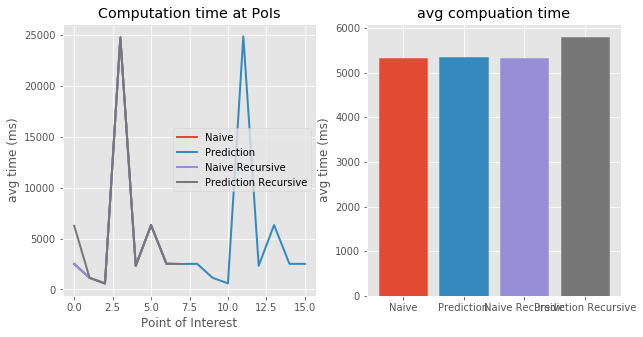

In [7]:
# Data for plotting
names = ["Naive", "Prediction", "Naive Recursive", "Prediction Recursive"]

plt.style.use('ggplot')
fig, (line, bar) = plt.subplots(1, 2, figsize=(10,5))
p0 = line.plot(np.arange(len(naive)), naive, label=names[0], lw=2)
p1 = line.plot(np.arange(len(prediction)), prediction, label=names[1], lw=2)
p2 = line.plot(np.arange(len(naiveRec)), naiveRec, label=names[2], lw=2)
p3 = line.plot(np.arange(len(predictionRec)), predictionRec, label=names[3], lw=2)

line.legend()

line.set(xlabel='Point of Interest', ylabel='avg time (ms)',
       title='Computation time at PoIs')
line.grid(True)

avg = np.asarray([np.average(naive), np.average(prediction), np.average(naiveRec), np.average(predictionRec)])
x_avg = np.arange(len(avg))

barlist = bar.bar(x_avg, avg)
# set colors of bars to match colors in line plot
barlist[0].set_color(p0[0].get_color())
barlist[1].set_color(p1[0].get_color())
barlist[2].set_color(p2[0].get_color())
barlist[3].set_color(p3[0].get_color())

bar.set_xticks(x_avg)
bar.set_xticklabels(names)
bar.set(ylabel="avg time (ms)",
       title="avg compuation time")
bar.grid(True)

fig.savefig("compuationTime.svg", format="svg")
plt.show()

All cells below here are just copies of the previous ones, just changed minimaly to display different data

In [5]:
naive = []
prediction = []

for d in data["datapoints"]:
    avg_time = np.asarray(list(map(lambda x: x["drawTime"],
                   d["data"]["workers"])))
    avg_time = np.average(avg_time)
    if d["balancer"] == "predictionRecursive":
        prediction.append(avg_time)
    else:
        naive.append(avg_time)

# time in ms
naive = np.asarray(naive) / 1000
prediction = np.asarray(prediction) / 1000
print(naive, prediction)

[ 6.03658333 10.11041667  8.144       6.56991667  7.35561538  6.23641667
  7.41941667  6.43641667] [1.96694286 2.50397059 2.19559459 2.24418919 2.28462162 2.13705556
 2.68731034 2.13545714]


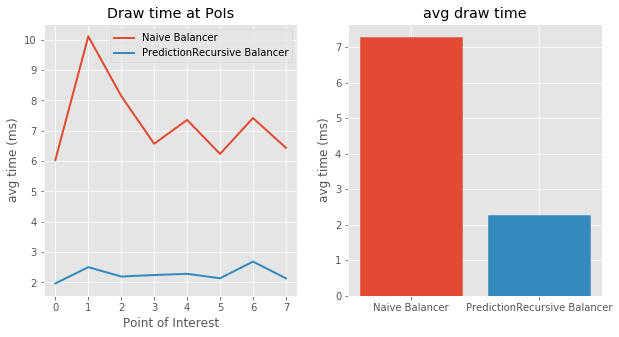

In [6]:
# Data for plotting
x = np.arange(len(naive))
names = ["Naive Balancer", "PredictionRecursive Balancer"]

plt.style.use('ggplot')
fig, (line, bar) = plt.subplots(1, 2, figsize=(10,5))
p0 = line.plot(x, naive, label=names[0], lw=2)
p1 = line.plot(x, prediction, label=names[1], lw=2)
line.legend()

line.set(xlabel='Point of Interest', ylabel='avg time (ms)',
       title='Draw time at PoIs')
line.grid(True)

avg = np.asarray([np.average(naive), np.average(prediction)])
x_avg = np.arange(len(avg))

barlist = bar.bar(x_avg, avg)
# set colors of bars to match colors in line plot
barlist[0].set_color(p0[0].get_color())
barlist[1].set_color(p1[0].get_color())

bar.set_xticks(x_avg)
bar.set_xticklabels(names)
bar.set(ylabel="avg time (ms)",
       title="avg draw time")
bar.grid(True)

plt.show()

In [7]:
naive = []
prediction = []

for d in data["datapoints"]:
    avg_time = np.asarray(list(map(lambda x: x["mpiTime"],
                   d["data"]["workers"])))
    avg_time = np.average(avg_time)
    if d["balancer"] == "predictionRecursive":
        prediction.append(avg_time)
    else:
        naive.append(avg_time)

# time in ms
naive = np.asarray(naive) / 1000
prediction = np.asarray(prediction) / 1000
print(naive, prediction)

[0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0.]


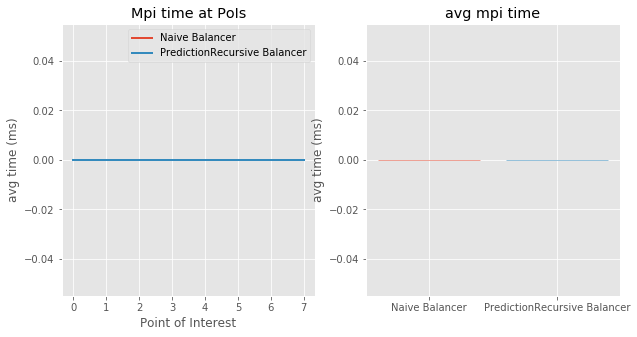

In [8]:
# Data for plotting
x = np.arange(len(naive))
names = ["Naive Balancer", "PredictionRecursive Balancer"]

plt.style.use('ggplot')
fig, (line, bar) = plt.subplots(1, 2, figsize=(10,5))
p0 = line.plot(x, naive, label=names[0], lw=2)
p1 = line.plot(x, prediction, label=names[1], lw=2)
line.legend()

line.set(xlabel='Point of Interest', ylabel='avg time (ms)',
       title='Mpi time at PoIs')
line.grid(True)

avg = np.asarray([np.average(naive), np.average(prediction)])
x_avg = np.arange(len(avg))

barlist = bar.bar(x_avg, avg)
# set colors of bars to match colors in line plot
barlist[0].set_color(p0[0].get_color())
barlist[1].set_color(p1[0].get_color())

bar.set_xticks(x_avg)
bar.set_xticklabels(names)
bar.set(ylabel="avg time (ms)",
       title="avg mpi time")
bar.grid(True)

plt.show()